### Active Product Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
order_details = pd.read_csv('OD.csv')
order_details.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [11]:
# Create DateTime column 
order_details['Time'] = pd.to_datetime(order_details['Transaction Date']) 
# after we extracted hour from transaction date column
order_details['Hour'] = (order_details['Time']).dt.hour

timemost1 = order_details['Hour'].value_counts().index.tolist()[:24]
timemost2 = order_details['Hour'].value_counts().values.tolist()[:24]

tmost = np.column_stack((timemost1, timemost2))

In [12]:
print("Hour of the day" + "\t" + "Cummulative Number of purchases \n")
print('\n'.join('\t\t'.join(map(str,row)) for row in tmost))

Hour of the day	Cummulative Number of purchases 

12		51
23		51
22		45
19		42
15		41
21		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
5		3
2		3
6		2
3		1


In [16]:
timemost = order_details['Hour'].value_counts() 
timemost1 = [] 

for i in range(0,23): 
    timemost1.append(i) 
    
timemost2 = timemost.sort_index() 
timemost2.tolist() 
timemost2 = pd.DataFrame(timemost2) 

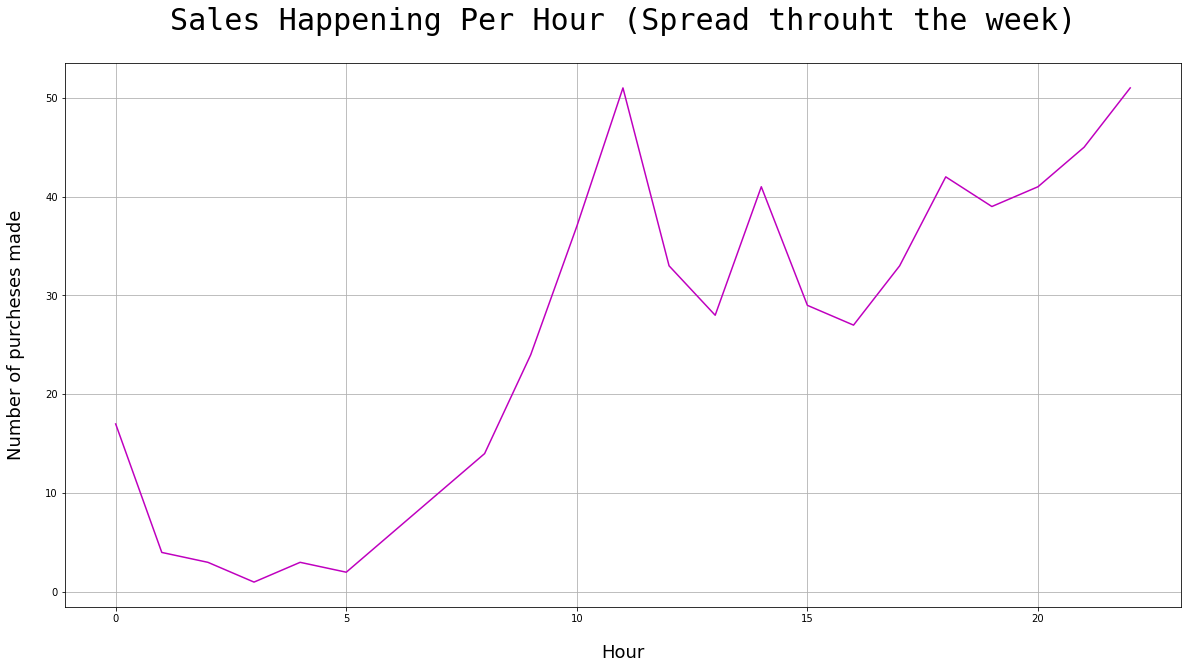

In [19]:
plt.figure(figsize=(20,10))

plt.title("Sales Happening Per Hour (Spread throuht the week)", fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number of purcheses made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()